# Exploring Gene Causality

### Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Importing necessary files

In [3]:
phenotype = pd.read_csv('data/opentargets_step2.for_llm.tsv', sep='\t')
causal_gene = pd.read_csv('data/opentargets_step2.labels', sep='\t')

### Mapping Causal and Non-causal genes

In [4]:
# Merging "opentargets_step2.for_llm.tsv" with "opentargets_step2.labels"

gene_causality = pd.merge(phenotype, causal_gene, left_index=True, right_index=True)
gene_causality.head()

,row_number,description,symbol_gene_string,ensembl_gene_string,symbol,gene
0,1,Carotenoid and tocopherol levels (beta-caroten...,"{ATMIN},{BCO1},{C16orf46},{CDYL2},{CENPN},{CMC...","{ENSG00000103121},{ENSG00000135697},{ENSG00000...",BCO1,ENSG00000135697
1,2,Bilirubin levels,"{ATG16L1},{DGKD},{HJURP},{MROH2A},{SAG},{SPP2}...","{ENSG00000072080},{ENSG00000077044},{ENSG00000...",UGT1A8,ENSG00000242366
2,3,Bilirubin levels,"{ARHGAP4},{ATP6AP1},{AVPR2},{CTAG1A},{CTAG1B},...","{ENSG00000007350},{ENSG00000013563},{ENSG00000...",G6PD,ENSG00000160211
3,4,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,"{ESR2},{GPHB5},{PPP2R5E},{RHOJ},{SGPP1},{SYNE2...","{ENSG00000054654},{ENSG00000126785},{ENSG00000...",SGPP1,ENSG00000126821
4,5,Fasting glucose-related traits (FPG) (D-Glucose),"{ABCB11},{CERS6},{DHRS9},{G6PC2},{LRP2},{NOSTR...","{ENSG00000073734},{ENSG00000073737},{ENSG00000...",G6PC2,ENSG00000152254


In [5]:
# Re-arranging and Renaming columns for better interpretation

gene_causality.drop(columns=['row_number'], inplace=True)
gene_causality = gene_causality.rename(columns={'symbol_gene_string': 'non_causal_gene_symbol', 'symbol':'causal_gene_symbol', 'ensembl_gene_string':'non_causal_gene', 'gene':'causal_gene'})
gene_causality = gene_causality[['description', 'causal_gene_symbol', 'non_causal_gene_symbol', 'causal_gene', 'non_causal_gene']]

In [6]:
gene_causality.head()

,description,causal_gene_symbol,non_causal_gene_symbol,causal_gene,non_causal_gene
0,Carotenoid and tocopherol levels (beta-caroten...,BCO1,"{ATMIN},{BCO1},{C16orf46},{CDYL2},{CENPN},{CMC...",ENSG00000135697,"{ENSG00000103121},{ENSG00000135697},{ENSG00000..."
1,Bilirubin levels,UGT1A8,"{ATG16L1},{DGKD},{HJURP},{MROH2A},{SAG},{SPP2}...",ENSG00000242366,"{ENSG00000072080},{ENSG00000077044},{ENSG00000..."
2,Bilirubin levels,G6PD,"{ARHGAP4},{ATP6AP1},{AVPR2},{CTAG1A},{CTAG1B},...",ENSG00000160211,"{ENSG00000007350},{ENSG00000013563},{ENSG00000..."
3,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,SGPP1,"{ESR2},{GPHB5},{PPP2R5E},{RHOJ},{SGPP1},{SYNE2...",ENSG00000126821,"{ENSG00000054654},{ENSG00000126785},{ENSG00000..."
4,Fasting glucose-related traits (FPG) (D-Glucose),G6PC2,"{ABCB11},{CERS6},{DHRS9},{G6PC2},{LRP2},{NOSTR...",ENSG00000152254,"{ENSG00000073734},{ENSG00000073737},{ENSG00000..."


### Creating a Unique Data Subset

#### Generating Hash Value

In [7]:
import hashlib

name = 'priyanshurao'

# Creating a hash using SHA-256
hash_object = hashlib.sha256(name.encode())
hash_values = int(hash_object.hexdigest(), 16)

print(f'Hash Value: {hash_values}')

Hash Value: 92809370568750228341718092559122365287424820600467330445745328006855960134190


#### Sampling 500 Phenotypes using Hash Seed

In [8]:
import random

random.seed(hash_values)
df = gene_causality.sample(n=500, random_state=random.randint(0, 2**32 - 1))

# Sorting df by index number
df = df.sort_index()

# Resetting index
df.reset_index(inplace=True, drop=True)

display(df)

,description,causal_gene_symbol,non_causal_gene_symbol,causal_gene,non_causal_gene
0,Bilirubin levels,UGT1A8,"{ATG16L1},{DGKD},{HJURP},{MROH2A},{SAG},{SPP2}...",ENSG00000242366,"{ENSG00000072080},{ENSG00000077044},{ENSG00000..."
1,Bilirubin levels,G6PD,"{ARHGAP4},{ATP6AP1},{AVPR2},{CTAG1A},{CTAG1B},...",ENSG00000160211,"{ENSG00000007350},{ENSG00000013563},{ENSG00000..."
2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,SGPP1,"{ESR2},{GPHB5},{PPP2R5E},{RHOJ},{SGPP1},{SYNE2...",ENSG00000126821,"{ENSG00000054654},{ENSG00000126785},{ENSG00000..."
3,Vitamin D insufficiency (25-Hydroxyvitamin D2),GC,"{GC},{NPFFR2},{SLC4A4}",ENSG00000145321,"{ENSG00000056291},{ENSG00000080493},{ENSG00000..."
4,Phosphorus levels,FGF23,"{AKAP3},{C12orf4},{CCND2},{DYRK4},{ENSG0000025...",ENSG00000118972,"{ENSG00000010219},{ENSG00000047621},{ENSG00000..."
...,...,...,...,...,...
495,platelet crit (plateletcrit),ZFPM2,{ZFPM2},ENSG00000169946,{ENSG00000169946}
496,melanocytic naevi (skin pigmentation),BNC2,"{BNC2},{CNTLN}",ENSG00000173068,"{ENSG00000044459},{ENSG00000173068}"
497,treatment with nicorandil (coronary artery dis...,CDKN2A,"{CDKN2A},{CDKN2B},{DMRTA1},{MTAP}",ENSG00000147889,"{ENSG00000099810},{ENSG00000147883},{ENSG00000..."
498,treatment with nicorandil (coronary artery dis...,CDKN2B,"{CDKN2A},{CDKN2B},{DMRTA1},{MTAP}",ENSG00000147883,"{ENSG00000099810},{ENSG00000147883},{ENSG00000..."


### Data Cleaning & Overview

In [9]:
df['non_causal_gene_symbol'] = df['non_causal_gene_symbol'].str.replace('{','').str.replace('}','')
df['non_causal_gene'] = df['non_causal_gene'].str.replace('{','').str.replace('}','')

In [10]:
df.head()

,description,causal_gene_symbol,non_causal_gene_symbol,causal_gene,non_causal_gene
0,Bilirubin levels,UGT1A8,"ATG16L1,DGKD,HJURP,MROH2A,SAG,SPP2,TRPM8,UGT1A...",ENSG00000242366,"ENSG00000072080,ENSG00000077044,ENSG0000008597..."
1,Bilirubin levels,G6PD,"ARHGAP4,ATP6AP1,AVPR2,CTAG1A,CTAG1B,CTAG2,DKC1...",ENSG00000160211,"ENSG00000007350,ENSG00000013563,ENSG0000006784..."
2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,SGPP1,"ESR2,GPHB5,PPP2R5E,RHOJ,SGPP1,SYNE2,WDR89",ENSG00000126821,"ENSG00000054654,ENSG00000126785,ENSG0000012682..."
3,Vitamin D insufficiency (25-Hydroxyvitamin D2),GC,"GC,NPFFR2,SLC4A4",ENSG00000145321,"ENSG00000056291,ENSG00000080493,ENSG00000145321"
4,Phosphorus levels,FGF23,"AKAP3,C12orf4,CCND2,DYRK4,ENSG00000255639,ENSG...",ENSG00000118972,"ENSG00000010219,ENSG00000047621,ENSG0000007823..."


#### Checking for Missing Data

In [11]:
# Checking for Missing data
df.isnull().sum()

description               0
causal_gene_symbol        0
non_causal_gene_symbol    0
causal_gene               0
non_causal_gene           0
dtype: int64

#### Checking for Duplicate Rows and Handling them if any

In [12]:
# Checking for Duplicate rows
df.duplicated().sum()

113

In [13]:
df[df.duplicated()]

,description,causal_gene_symbol,non_causal_gene_symbol,causal_gene,non_causal_gene
133,Hypercholesterolemia,PCSK9,"ACOT11,BSND,DHCR24,FAM151A,LEXM,MROH7,MROH7-TT...",ENSG00000169174,"ENSG00000006555,ENSG00000116133,ENSG0000014300..."
136,Coronary artery disease,PCSK9,"ACOT11,BSND,DHCR24,FAM151A,LEXM,MROH7,MROH7-TT...",ENSG00000169174,"ENSG00000006555,ENSG00000116133,ENSG0000014300..."
137,Coronary artery disease,PCSK9,"ACOT11,BSND,DHCR24,FAM151A,LEXM,MROH7,MROH7-TT...",ENSG00000169174,"ENSG00000006555,ENSG00000116133,ENSG0000014300..."
139,High cholesterol (Hypercholesterolemia),PCSK9,"ACOT11,BSND,DHCR24,FAM151A,LEXM,MROH7,MROH7-TT...",ENSG00000169174,"ENSG00000006555,ENSG00000116133,ENSG0000014300..."
143,Rheumatoid arthritis,IL6R,"ADAR,AQP10,ATP8B2,C1orf43,CFAP141,CHRNB2,CREB3...",ENSG00000160712,"ENSG00000143515,ENSG00000143543,ENSG0000014354..."
...,...,...,...,...,...
417,Type 2 diabetes (type II diabetes mellitus),GLIS3,"AK3,CDC37L1,GLIS3,PLPP6,SLC1A1,SPATA6L",ENSG00000107249,"ENSG00000106686,ENSG00000106688,ENSG0000010699..."
418,Type 2 diabetes (type II diabetes mellitus),GLIS3,"AK3,CDC37L1,GLIS3,PLPP6,SLC1A1,SPATA6L",ENSG00000107249,"ENSG00000106686,ENSG00000106688,ENSG0000010699..."
419,Type 2 diabetes (type II diabetes mellitus),GLIS3,"AK3,CDC37L1,GLIS3,PLPP6,SLC1A1,SPATA6L",ENSG00000107249,"ENSG00000106686,ENSG00000106688,ENSG0000010699..."
422,Breast carcinoma,CCND1,"ANO1,CCND1,ENSG00000287725,FGF19,FGF3,FGF4,LTO...",ENSG00000110092,"ENSG00000075388,ENSG00000110092,ENSG0000013162..."


In [14]:
# Droping Duplicated Rows
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(inplace=True, drop=True)
df.shape

(387, 5)

#### Checking for number of unique Phenotypes, causal/non_causal genes

In [15]:
# Checking for number of unique Phenotypes, caual/non_causal genes

print('Number of Unique Phenotypes:', df['description'].nunique())
print('Number of Unique Casual Genes (Symbol):', df['causal_gene_symbol'].nunique())
print('Number of Unique Non-Causal Genes (Symbol):', df['non_causal_gene_symbol'].nunique())

Number of Unique Phenotypes: 215
Number of Unique Casual Genes (Symbol): 267
Number of Unique Non-Causal Genes (Symbol): 291


### Distribution of Causal and Non-Causal Genes

In [16]:
# Phenotype overview

df['description'].describe()

count                                             387
unique                                            215
top       Type 2 diabetes (type II diabetes mellitus)
freq                                               38
Name: description, dtype: object

In [17]:
# Top 5 most common Phenotypes

top5_phenotypes = df['description'].value_counts().head(5)
top5_phenotypes

Type 2 diabetes (type II diabetes mellitus)                       38
Breast carcinoma                                                  16
Type 2 diabetes (adjusted for BMI) (type II diabetes mellitus)    10
Hypertension                                                       9
Atrial fibrillation                                                9
Name: description, dtype: int64

In [18]:
# Identifying Number of Causal Genes for Top 5 Phenotypes

dict = {}
for i in list(top5_phenotypes.keys()):   
    temp = df[df['description'] == i]
    dict[i] = len(temp.causal_gene_symbol.unique())

display(dict)

{'Type 2 diabetes (type II diabetes mellitus)': 25,
 'Breast carcinoma': 16,
 'Type 2 diabetes (adjusted for BMI) (type II diabetes mellitus)': 10,
 'Hypertension': 7,
 'Atrial fibrillation': 6}

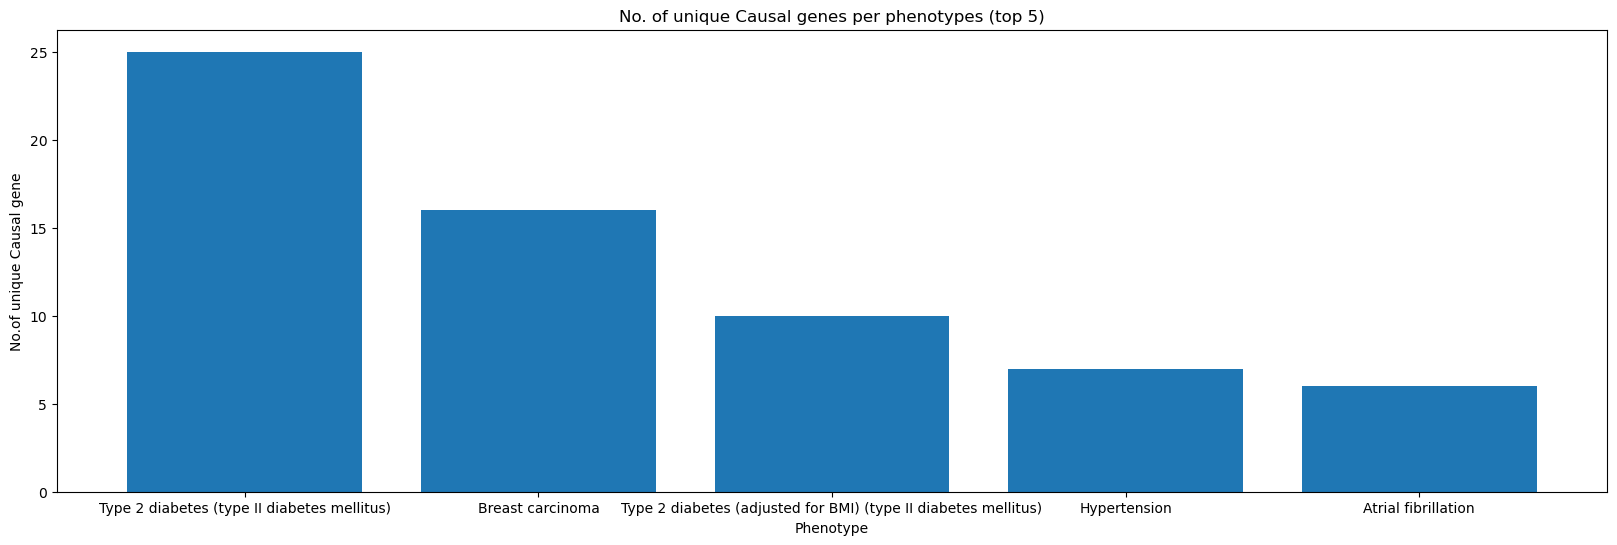

In [19]:
# Visualizing number of causal genes for top 5 phenotypes

plt.figure(figsize=(20,6))
plt.bar(dict.keys(), height=dict.values())
plt.xlabel('Phenotype')
plt.ylabel('No.of unique Causal gene')
plt.title('No. of unique Causal genes per phenotypes (top 5)')
plt.show()

Some phenotypes have multiple associated causal and non-causal genes, so based on the above analysis, these five phenotypes dominate the dataset.

<Axes: ylabel='Frequency'>

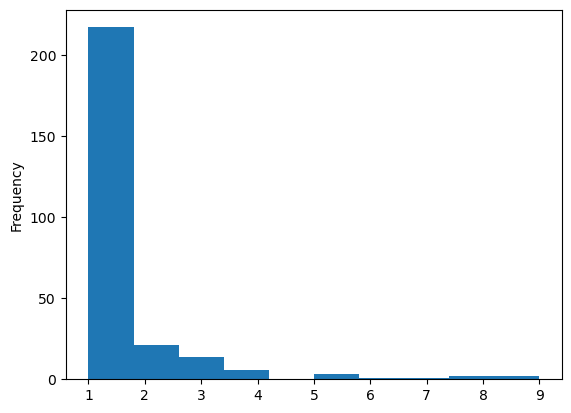

In [20]:
# Distribution of Causal Genes

df['causal_gene_symbol'].value_counts().plot(kind='hist')

Based on the causal gene distribution, there seems to be very few phenotypes that are caused by multiple genes, most of the phenotypes have one or few causal genes.

### Causal vs Non-Causal Genes

In [21]:
# Association of non-causal genes with each phenotype

df['non_causal_gene_count'] = df['non_causal_gene_symbol'].apply(lambda x: len(x.split(',')))
df['non_causal_gene_count'].describe()

count    387.000000
mean      14.963824
std       12.035730
min        1.000000
25%        6.000000
50%       12.000000
75%       20.500000
max       70.000000
Name: non_causal_gene_count, dtype: float64

In [22]:
# Genes that occur frequently as causal
df['causal_gene_symbol'].value_counts().head(10)

HMGCR       9
F2          9
PCSK9       8
IL5         8
IL12B       7
ESR1        6
SLC22A12    5
SLC12A3     5
GUCY1B1     5
PAM         4
Name: causal_gene_symbol, dtype: int64

### EDA on Embeddings

### Importing Embedding Files

In [23]:
# Importing Files

gene_embeddings = pd.read_csv('data/gene_embeddings.csv')
phenotype_embeddings = pd.read_csv('data/phenotype_embeddings.csv')

In [24]:
# Dropping unnecessary columns

gene_embeddings.drop(columns=['Unnamed: 0'], inplace=True)
phenotype_embeddings.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
display(gene_embeddings)

,0,gpt_description,embedding
0,ATMIN,"The ATMIN gene, also known as ATM interactor (...","[-0.01672099530696869, 0.025642508640885353, -..."
1,BCO1,"Gene BCO1, also known as beta-carotene oxygena...","[0.01961715891957283, -0.0013358700089156628, ..."
2,C16orf46,"Gene C16orf46, also known as Chromosome 16 Ope...","[-0.013213221915066242, 0.008565986528992653, ..."
3,CDYL2,"The gene CDYL2, also known as Chromodomain Y-l...","[-0.010155326686799526, 0.007696880027651787, ..."
4,CENPN,"The gene CENPN, also known as Centromere Prote...","[0.0019102469086647034, -0.01410931721329689, ..."
...,...,...,...
10978,BOLA2-SMG1P6,The gene BOLA2-SMG1P6 is a fusion gene that re...,"[0.025516435503959656, 0.024719441309571266, -..."
10979,SLX1B,The SLX1B gene is a member of the SLX1 family ...,"[0.021502379328012466, 0.04098100587725639, -0..."
10980,SULT1A4,The gene SULT1A4 encodes for the enzyme sulfot...,"[-0.028887486085295677, 0.015331678092479706, ..."
10981,OR9I1,Gene OR9I1 is a member of the olfactory recept...,"[-0.015196411870419979, 0.005497212056070566, ..."


In [26]:
display(phenotype_embeddings)

,0,gpt_description,embedding
0,Carotenoid and tocopherol levels (beta-caroten...,Carotenoids and tocopherols are important clas...,"[0.03543854132294655, -0.002083840314298868, -..."
1,Bilirubin levels,Bilirubin is a yellow pigment that is produced...,"[-0.002501995535567403, -0.03334518149495125, ..."
2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,Sphingolipids are a class of lipids that play ...,"[-0.003154945094138384, -0.016002262011170387,..."
3,Fasting glucose-related traits (FPG) (D-Glucose),"Fasting glucose-related traits, also known as ...","[-0.026761554181575775, 0.011279185302555561, ..."
4,Vitamin D insufficiency (25-Hydroxyvitamin D2),"Vitamin D insufficiency, specifically referrin...","[0.004818837624043226, 0.01093713752925396, -0..."
...,...,...,...
954,Platelet forward scatter,Platelet forward scatter is a measurement used...,"[-0.029527518898248672, -0.002429093699902296,..."
955,Platelet large cell ratio,The platelet large cell ratio is a measure of ...,"[-0.01740766316652298, -0.02192745730280876, -..."
956,Diverticular disease,Diverticular disease is a common condition cha...,"[0.010556966066360474, 0.013189040124416351, -..."
957,Metabolite levels (cysteine-glutathione disulf...,"Metabolite levels, specifically cysteine-gluta...","[-0.01695943996310234, -0.0002931176859419793,..."


In [27]:
# Merging Gene Embeddings and Phenotype Embeddings to the dataframe

df = df.merge(gene_embeddings, left_on='causal_gene_symbol', right_on='0', how='left')
df = df.merge(phenotype_embeddings, left_on='description', right_on='0', how='left')

In [28]:
df.head()

,description,causal_gene_symbol,non_causal_gene_symbol,causal_gene,non_causal_gene,non_causal_gene_count,0_x,gpt_description_x,embedding_x,0_y,gpt_description_y,embedding_y
0,Bilirubin levels,UGT1A8,"ATG16L1,DGKD,HJURP,MROH2A,SAG,SPP2,TRPM8,UGT1A...",ENSG00000242366,"ENSG00000072080,ENSG00000077044,ENSG0000008597...",17,UGT1A8,The gene UGT1A8 belongs to the UDP-glucuronosy...,"[-0.019281543791294098, -0.005337069276720285,...",Bilirubin levels,Bilirubin is a yellow pigment that is produced...,"[-0.002501995535567403, -0.03334518149495125, ..."
1,Bilirubin levels,G6PD,"ARHGAP4,ATP6AP1,AVPR2,CTAG1A,CTAG1B,CTAG2,DKC1...",ENSG00000160211,"ENSG00000007350,ENSG00000013563,ENSG0000006784...",39,G6PD,"The gene G6PD, also known as glucose-6-phospha...","[-0.02900269255042076, 0.053225744515657425, 0...",Bilirubin levels,Bilirubin is a yellow pigment that is produced...,"[-0.002501995535567403, -0.03334518149495125, ..."
2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,SGPP1,"ESR2,GPHB5,PPP2R5E,RHOJ,SGPP1,SYNE2,WDR89",ENSG00000126821,"ENSG00000054654,ENSG00000126785,ENSG0000012682...",7,SGPP1,"The SGPP1 gene, also known as Sphingosine-1-ph...","[-0.011303119361400604, 0.028949962928891182, ...",Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,Sphingolipids are a class of lipids that play ...,"[-0.003154945094138384, -0.016002262011170387,..."
3,Vitamin D insufficiency (25-Hydroxyvitamin D2),GC,"GC,NPFFR2,SLC4A4",ENSG00000145321,"ENSG00000056291,ENSG00000080493,ENSG00000145321",3,GC,"The gene GC, also known as the group-specific ...","[0.04094875603914261, 0.009499085135757923, -0...",Vitamin D insufficiency (25-Hydroxyvitamin D2),"Vitamin D insufficiency, specifically referrin...","[0.004818837624043226, 0.01093713752925396, -0..."
4,Phosphorus levels,FGF23,"AKAP3,C12orf4,CCND2,DYRK4,ENSG00000255639,ENSG...",ENSG00000118972,"ENSG00000010219,ENSG00000047621,ENSG0000007823...",15,FGF23,The gene FGF23 encodes a protein called fibrob...,"[0.0038235990796238184, 0.03755037859082222, -...",Phosphorus levels,Phosphorus is an essential mineral that plays ...,"[-0.00845419429242611, -0.008621890097856522, ..."


#### Cleaning Data

In [29]:
# Dropping Unnecessary columns

df.drop(columns=['0_x', '0_y'], inplace=True)

In [30]:
# Renaming columns for better readability

df.rename(columns={'gpt_description_x': 'gene_gpt_description', 'embedding_x':'causal_gene_embedding', 'gpt_description_y':'phenotype_gpt_description', 'embedding_y':'phenotype_embedding'}, inplace=True)

In [31]:
# Converting Data into proper format

df['causal_gene_embedding'] = df['causal_gene_embedding'].str.replace('[', '').str.replace(']', '').str.replace(' ','').str.split(',')
df['phenotype_embedding'] = df['phenotype_embedding'].str.replace('[', '').str.replace(']', '').str.replace(' ','').str.split(',')

In [32]:
df.head()

,description,causal_gene_symbol,non_causal_gene_symbol,causal_gene,non_causal_gene,non_causal_gene_count,gene_gpt_description,causal_gene_embedding,phenotype_gpt_description,phenotype_embedding
0,Bilirubin levels,UGT1A8,"ATG16L1,DGKD,HJURP,MROH2A,SAG,SPP2,TRPM8,UGT1A...",ENSG00000242366,"ENSG00000072080,ENSG00000077044,ENSG0000008597...",17,The gene UGT1A8 belongs to the UDP-glucuronosy...,"[-0.019281543791294098, -0.005337069276720285,...",Bilirubin is a yellow pigment that is produced...,"[-0.002501995535567403, -0.03334518149495125, ..."
1,Bilirubin levels,G6PD,"ARHGAP4,ATP6AP1,AVPR2,CTAG1A,CTAG1B,CTAG2,DKC1...",ENSG00000160211,"ENSG00000007350,ENSG00000013563,ENSG0000006784...",39,"The gene G6PD, also known as glucose-6-phospha...","[-0.02900269255042076, 0.053225744515657425, 0...",Bilirubin is a yellow pigment that is produced...,"[-0.002501995535567403, -0.03334518149495125, ..."
2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,SGPP1,"ESR2,GPHB5,PPP2R5E,RHOJ,SGPP1,SYNE2,WDR89",ENSG00000126821,"ENSG00000054654,ENSG00000126785,ENSG0000012682...",7,"The SGPP1 gene, also known as Sphingosine-1-ph...","[-0.011303119361400604, 0.028949962928891182, ...",Sphingolipids are a class of lipids that play ...,"[-0.003154945094138384, -0.016002262011170387,..."
3,Vitamin D insufficiency (25-Hydroxyvitamin D2),GC,"GC,NPFFR2,SLC4A4",ENSG00000145321,"ENSG00000056291,ENSG00000080493,ENSG00000145321",3,"The gene GC, also known as the group-specific ...","[0.04094875603914261, 0.009499085135757923, -0...","Vitamin D insufficiency, specifically referrin...","[0.004818837624043226, 0.01093713752925396, -0..."
4,Phosphorus levels,FGF23,"AKAP3,C12orf4,CCND2,DYRK4,ENSG00000255639,ENSG...",ENSG00000118972,"ENSG00000010219,ENSG00000047621,ENSG0000007823...",15,The gene FGF23 encodes a protein called fibrob...,"[0.0038235990796238184, 0.03755037859082222, -...",Phosphorus is an essential mineral that plays ...,"[-0.00845419429242611, -0.008621890097856522, ..."


In [33]:
# Checking for Missing Values

df.isnull().sum()

description                   0
causal_gene_symbol            0
non_causal_gene_symbol        0
causal_gene                   0
non_causal_gene               0
non_causal_gene_count         0
gene_gpt_description          0
causal_gene_embedding         0
phenotype_gpt_description    22
phenotype_embedding          22
dtype: int64

In [34]:
# Dropping null values

df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

##### Applying Dimension Reduction methods for further analysis

In [35]:
# Applying Principal Component Analysis

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

reduced_embeddings = pca.fit_transform(df['causal_gene_embedding'].to_list())
df['causal_gene_embedding'] = reduced_embeddings.tolist()

reduced_embeddings = pca.fit_transform(df['phenotype_embedding'].to_list())
df['phenotype_embedding'] = reduced_embeddings.tolist()

In [36]:
df.head()

,description,causal_gene_symbol,non_causal_gene_symbol,causal_gene,non_causal_gene,non_causal_gene_count,gene_gpt_description,causal_gene_embedding,phenotype_gpt_description,phenotype_embedding
0,Bilirubin levels,UGT1A8,"ATG16L1,DGKD,HJURP,MROH2A,SAG,SPP2,TRPM8,UGT1A...",ENSG00000242366,"ENSG00000072080,ENSG00000077044,ENSG0000008597...",17,The gene UGT1A8 belongs to the UDP-glucuronosy...,"[-0.151290019111138, -0.09900812747591188]",Bilirubin is a yellow pigment that is produced...,"[-0.1820697499272254, -0.11528358566852265]"
1,Bilirubin levels,G6PD,"ARHGAP4,ATP6AP1,AVPR2,CTAG1A,CTAG1B,CTAG2,DKC1...",ENSG00000160211,"ENSG00000007350,ENSG00000013563,ENSG0000006784...",39,"The gene G6PD, also known as glucose-6-phospha...","[-0.06833293980188676, -0.02553408202213633]",Bilirubin is a yellow pigment that is produced...,"[-0.18206974992722488, -0.11528358566852065]"
2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,SGPP1,"ESR2,GPHB5,PPP2R5E,RHOJ,SGPP1,SYNE2,WDR89",ENSG00000126821,"ENSG00000054654,ENSG00000126785,ENSG0000012682...",7,"The SGPP1 gene, also known as Sphingosine-1-ph...","[-0.11680610628160533, 0.01797285456070259]",Sphingolipids are a class of lipids that play ...,"[-0.2574174937108582, -0.142658955683318]"
3,Vitamin D insufficiency (25-Hydroxyvitamin D2),GC,"GC,NPFFR2,SLC4A4",ENSG00000145321,"ENSG00000056291,ENSG00000080493,ENSG00000145321",3,"The gene GC, also known as the group-specific ...","[0.0627673155035477, 0.04571047997600332]","Vitamin D insufficiency, specifically referrin...","[-0.11293725914211786, -0.1853394285763402]"
4,Phosphorus levels,FGF23,"AKAP3,C12orf4,CCND2,DYRK4,ENSG00000255639,ENSG...",ENSG00000118972,"ENSG00000010219,ENSG00000047621,ENSG0000007823...",15,The gene FGF23 encodes a protein called fibrob...,"[0.040922551447732776, -0.0006576377046954525]",Phosphorus is an essential mineral that plays ...,"[-0.20361385284417927, -0.08258149516482377]"


##### Compiling embeddings for non-causal genes

In [37]:
# Creating a dictionary for embeddings

embedding_lookup = df.set_index('causal_gene_symbol')['causal_gene_embedding'].to_dict()

In [38]:
# Defining function for mapping non_causal_embeddings

def get_non_causal_embeddings(non_causal_genes):
    embeddings = []
    for gene in non_causal_genes.split(','):
        if gene in embedding_lookup:
            embeddings.append(embedding_lookup[gene])
    
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return None

In [39]:
# Creating a separate column for Non_causal_embeddings

df['non_causal_gene_embedding'] = df['non_causal_gene_symbol'].apply(get_non_causal_embeddings)

In [40]:
# Checking for Missing Values

df.isnull().sum()

description                  0
causal_gene_symbol           0
non_causal_gene_symbol       0
causal_gene                  0
non_causal_gene              0
non_causal_gene_count        0
gene_gpt_description         0
causal_gene_embedding        0
phenotype_gpt_description    0
phenotype_embedding          0
non_causal_gene_embedding    6
dtype: int64

In [41]:
# Dropping Missing Values

df.dropna(inplace=True)
display(df.head())
display(df.shape)

,description,causal_gene_symbol,non_causal_gene_symbol,causal_gene,non_causal_gene,non_causal_gene_count,gene_gpt_description,causal_gene_embedding,phenotype_gpt_description,phenotype_embedding,non_causal_gene_embedding
0,Bilirubin levels,UGT1A8,"ATG16L1,DGKD,HJURP,MROH2A,SAG,SPP2,TRPM8,UGT1A...",ENSG00000242366,"ENSG00000072080,ENSG00000077044,ENSG0000008597...",17,The gene UGT1A8 belongs to the UDP-glucuronosy...,"[-0.151290019111138, -0.09900812747591188]",Bilirubin is a yellow pigment that is produced...,"[-0.1820697499272254, -0.11528358566852265]","[-0.08426456805904285, -0.07886668864840206]"
1,Bilirubin levels,G6PD,"ARHGAP4,ATP6AP1,AVPR2,CTAG1A,CTAG1B,CTAG2,DKC1...",ENSG00000160211,"ENSG00000007350,ENSG00000013563,ENSG0000006784...",39,"The gene G6PD, also known as glucose-6-phospha...","[-0.06833293980188676, -0.02553408202213633]",Bilirubin is a yellow pigment that is produced...,"[-0.18206974992722488, -0.11528358566852065]","[-0.06833293980188676, -0.02553408202213633]"
2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,SGPP1,"ESR2,GPHB5,PPP2R5E,RHOJ,SGPP1,SYNE2,WDR89",ENSG00000126821,"ENSG00000054654,ENSG00000126785,ENSG0000012682...",7,"The SGPP1 gene, also known as Sphingosine-1-ph...","[-0.11680610628160533, 0.01797285456070259]",Sphingolipids are a class of lipids that play ...,"[-0.2574174937108582, -0.142658955683318]","[0.03904285296658052, 0.06838403973927627]"
3,Vitamin D insufficiency (25-Hydroxyvitamin D2),GC,"GC,NPFFR2,SLC4A4",ENSG00000145321,"ENSG00000056291,ENSG00000080493,ENSG00000145321",3,"The gene GC, also known as the group-specific ...","[0.0627673155035477, 0.04571047997600332]","Vitamin D insufficiency, specifically referrin...","[-0.11293725914211786, -0.1853394285763402]","[0.06276731550354771, 0.04571047997600329]"
4,Phosphorus levels,FGF23,"AKAP3,C12orf4,CCND2,DYRK4,ENSG00000255639,ENSG...",ENSG00000118972,"ENSG00000010219,ENSG00000047621,ENSG0000007823...",15,The gene FGF23 encodes a protein called fibrob...,"[0.040922551447732776, -0.0006576377046954525]",Phosphorus is an essential mineral that plays ...,"[-0.20361385284417927, -0.08258149516482377]","[0.040922551447732776, -0.0006576377046954525]"


(359, 11)

### Vector Analysis

In [42]:
# Calculating Causal and Non-causal Difference

df['causal_diff_vector'] = df.apply(lambda row: np.array(row['phenotype_embedding']) - np.array(row['causal_gene_embedding']), axis=1)
df['non_causal_diff_vector'] = df.apply(lambda row: np.array(row['phenotype_embedding']) - np.array(row['non_causal_gene_embedding']), axis=1)

In [43]:
# Calculating Causal and Non-causal Magnitude

df['causal_magnitude'] = df['causal_diff_vector'].apply(lambda vec: np.linalg.norm(vec))
df['non_causal_magnitude'] = df['non_causal_diff_vector'].apply(lambda vec: np.linalg.norm(vec))

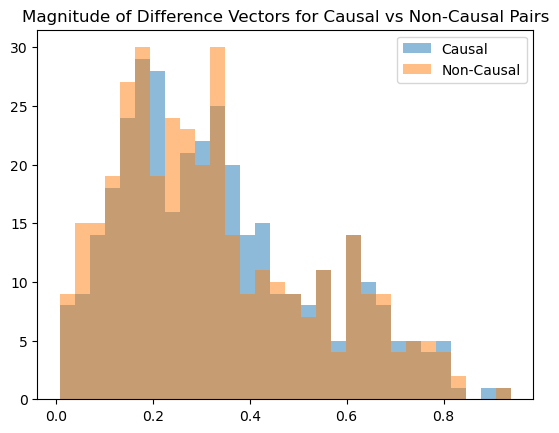

In [44]:
# Plotting the distribution of magnitudes

plt.hist(df['causal_magnitude'], bins=30, alpha=0.5, label='Causal')
plt.hist(df['non_causal_magnitude'], bins=30, alpha=0.5, label='Non-Causal')
plt.legend()
plt.title('Magnitude of Difference Vectors for Causal vs Non-Causal Pairs')
plt.show()

##### Observations

* Both causal and Non-Causal pairs have broadly overlapping distributions in terms of the magnitude of differnece vectors.

* However, there are subtle distinctions: causal pairs appear slightly more frequent in the 0.2 - 0.3 range, while non-causall pairs dominate in the 0.3 - 0.3 range.

* There are few instance where the non-causal gene-phenotype pairs might not be drastic in terms of vector magnitude.

##### Conclusion

This slight differences could indicate that causal and non-causal gene-phenotype pairs are not easily separable based on the magnitude of their differnece vectors alone. This overlap may suggest the need for more sophisticated feature engineering or analysis (such as focusing on specific dimensions of the embeddings) to identify a meaningful separation.


### Cluster Analysis

In [45]:
# Combining causal and non-causal difference vectors for clustering
diff_vectors = np.vstack((np.stack(df['causal_diff_vector']), np.stack(df['non_causal_diff_vector'])))
labels = ['causal'] * len(df) + ['non-causal'] * len(df)

In [46]:
# Performing PCA for 2D visualization

pca = PCA(n_components=2)
diff_vectors_2d = pca.fit_transform(diff_vectors)

In [47]:
# Applying K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(diff_vectors)
df['cluster_labels'] = kmeans.labels_[:len(df)]  # causal clusters
df['non_causal_cluster_labels'] = kmeans.labels_[len(df):]  # non-causal clusters

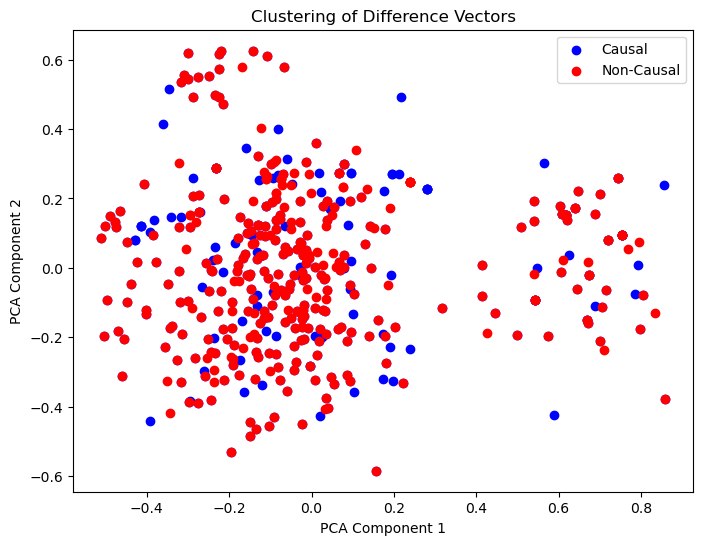

In [48]:
# Plotting the clusters

plt.figure(figsize=(8, 6))
plt.scatter(diff_vectors_2d[:len(df), 0], diff_vectors_2d[:len(df), 1], c='blue', label='Causal')
plt.scatter(diff_vectors_2d[len(df):, 0], diff_vectors_2d[len(df):, 1], c='red', label='Non-Causal')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('Clustering of Difference Vectors')
plt.show()

##### Observations for K-Means Cluster

* Both causal (blue) and non-causal (red) points are scattered throughout the plot, with a significant amount of overlap.

* There doesn't appear to be a clear separation or clustering of causal versus non-causal points based on the reduced components, although there are small clusters or groups, particularly towards the right-hand side of the plot.

* The PCA components which reduce the embedding's dimensionality, do not show a clear separation between causal and non-causal relationships, implying that these embeddings, when reduced, don't exhibit an obvious signal for distinguishing between causal and non-causal genes.

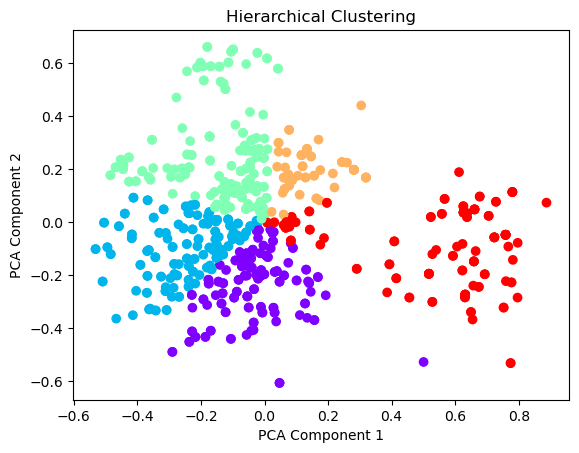

In [49]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='average')
hierarchical_labels = hierarchical.fit_predict(diff_vectors)

plt.scatter(diff_vectors[:, 0], diff_vectors[:, 1], c=hierarchical_labels, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

##### Observations for Hierarchical Clustering

* Comparing this output to the K-Means clustering results, the hierarchical clustering seems to have produced clusters that capture more granularity, particularly in terms of separating certain subsets.

* The clusters produced by hierarchical clustering could indicate that certain gene-phenotype pairs in particular, those in the well-separated clusters like red and purple may have distinct characteristics that differentiate them from the others.

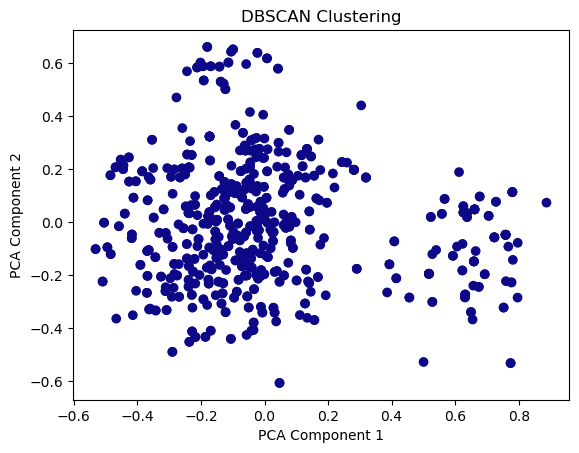

In [50]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(diff_vectors)

plt.scatter(diff_vectors[:, 0], diff_vectors[:, 1], c=dbscan_labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

##### Observations for DBSCAN Clustering

* A single cluster suggests that the feature embeddings for both causal and non-causal gene-phenotype pairs are relatively homogeneous in nature. This might further highlight the challenge in distinguishing these pairs based on the current embedding.

* DBSCAN is unable to form multiple clusters suggests that the data does not possess the kind of density variations DBSCAN requires, reinforcing the need for more advanced feature engineering or parameter tuning for better separation.